In [1]:
from scripts.shared_utilities import *

2024-06-05 12:43:15.223953: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 12:43:15.227036: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 12:43:15.271776: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 12:43:16.119163: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = KerasCNNModel(path=Path("../models/modello-passi-sonno-CNN.keras"),load=False)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 48, 20)         │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           961 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,801 (26.57 KB)

 Trainable params: 6,801 (26.57 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
data = DateStepSleepData(step_type="n_steps_all",sleep_score="mn_sleep_score_all",dataset_chunk=DEFAULT_CHUNK_SIZE*10)
data.get_dataset().describe()

steps    sleep_score         n_date    n_steps_all  \
count  977101.000000  606275.000000  977101.000000  977101.000000   
mean     7144.943182       0.600142       0.524287      -0.001271   
std      4705.429242       0.142913       0.287587       0.993723   
min         1.000000      -3.693348       0.000000      -1.509974   
25%      3744.040000       0.519543       0.277473      -0.719495   
50%      6403.730000       0.630341       0.532967      -0.157805   
75%      9782.340000       0.705176       0.780220       0.555712   
max    169728.490000       0.995091       1.000000      34.334165   

       n_sleep_score_all        m_steps       dm_steps   mn_steps_all  \
count      606275.000000  894293.000000  879786.000000  894293.000000   
mean           -0.013261    7257.585484      -0.002626       0.022518   
std             0.963736    3266.702985     553.477816       0.689883   
min           -28.966464       7.055000  -15214.288000      -1.508696   
25%            -0.556777    4939.336667    -282.475750      -0.467065   
50%             0.190390    6940.934000       1.075333      -0.044355   
75%             0.695040    9190.043000     282.378000       0.430626   
max             2.650084   42910.619000   15548.463000       7.551954   

       dmn_steps_all  m_sleep_score  dm_sleep_score  mn_sleep_score_all  \
count   8.797860e+05  588993.000000   576611.000000       588993.000000   
mean   -5.546689e-07       0.601640        0.000009           -0.003158   
std     1.168870e-01       0.090046        0.017837            0.607225   
min    -3.213051e+00      -0.568553       -0.551373           -7.894365   
25%    -5.965504e-02       0.553091       -0.009488           -0.330549   
50%     2.270958e-04       0.614504        0.000000            0.083594   
75%     5.963440e-02       0.660494        0.009485            0.393725   
max     3.283624e+00       0.928823        0.430622            2.203206   

       dmn_sleep_score_all  
count        576611.000000  
mean              0.000060  
std               0.120284  
min              -3.718188  
25%              -0.063983  
50%               0.000000  
75%               0.063961  
max               2.903902

In [4]:
utils = Utilities(model, data)

In [5]:
utils.train_model()

Epoch 1/20


2024-06-05 12:43:24.995400: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 123175680 exceeds 10% of free system memory.


10025/10025 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.3638 - r2_score: 0.0084 - val_loss: 0.3693 - val_r2_score: -0.0055
Epoch 2/20
10025/10025 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 0.3566 - r2_score: 0.0349 - val_loss: 0.3933 - val_r2_score: -0.0517
Epoch 3/20
10025/10025 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 0.3318 - r2_score: 0.1231 - val_loss: 0.4150 - val_r2_score: -0.0984
Epoch 4/20
10025/10025 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 0.3040 - r2_score: 0.2083 - val_loss: 0.4297 - val_r2_score: -0.1339
Epoch 5/20
10025/10025 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 0.2904 - r2_score: 0.2560 - val_loss: 0.4335 - val_r2_score: -0.1433
Epoch 6/20
10025/10025 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 0.2827 - r2_score: 0.2903 - val_loss: 0.4687 - val_r2_score: -0.2168


In [6]:
utils.evaluate_model()

1453/1453 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4345 - r2_score: -0.0228


[0.4648192226886749, -0.054435133934020996]

In [7]:
model.save()

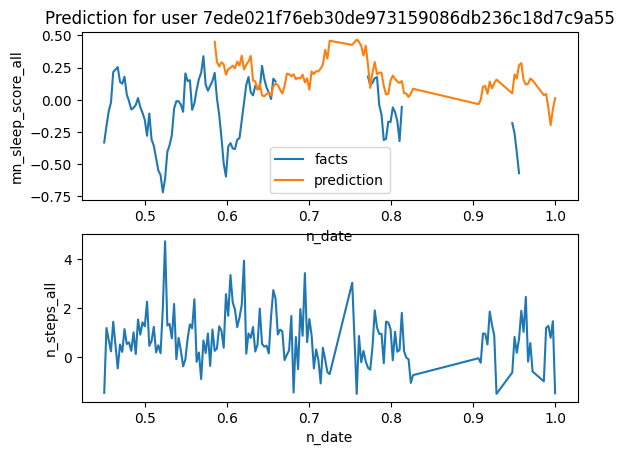

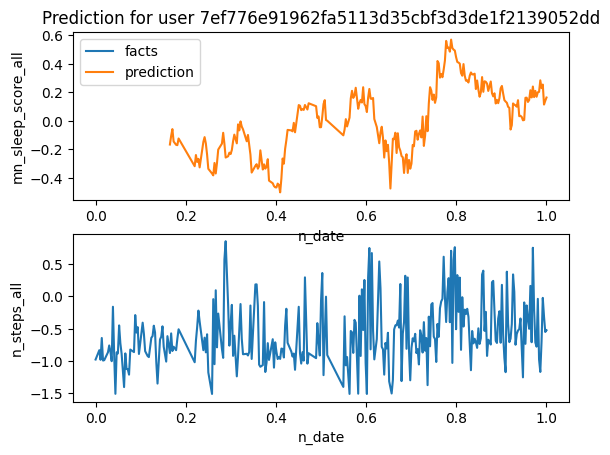

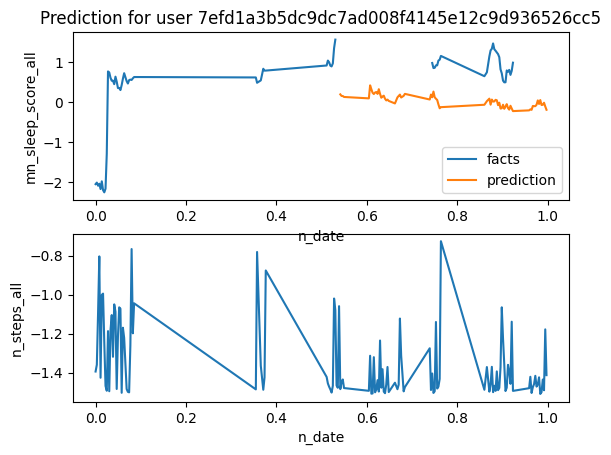

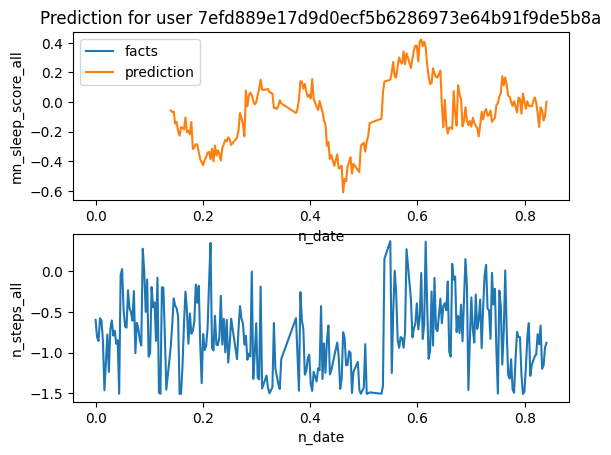

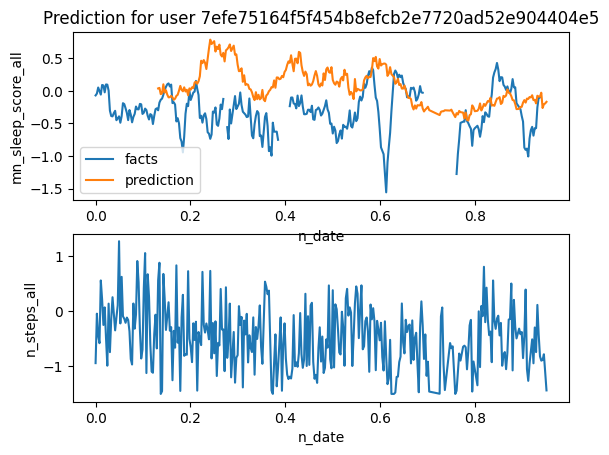

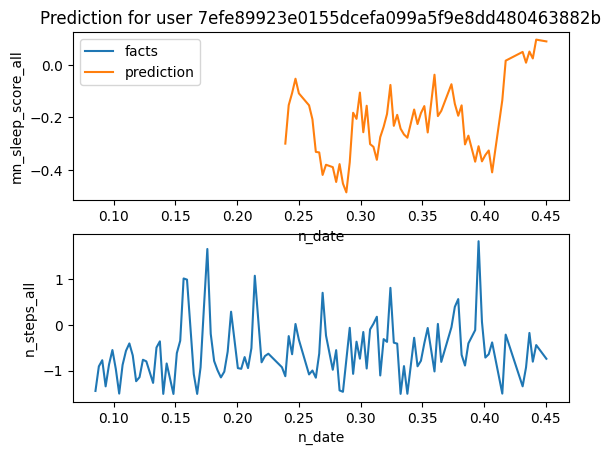

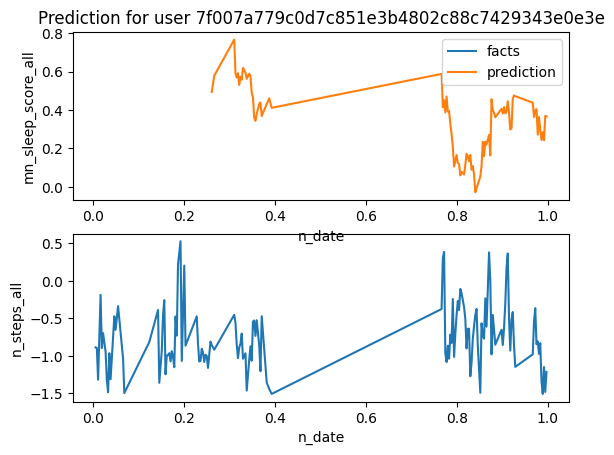

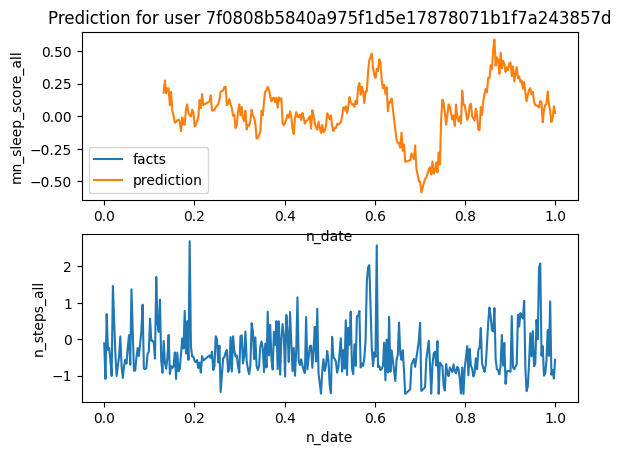

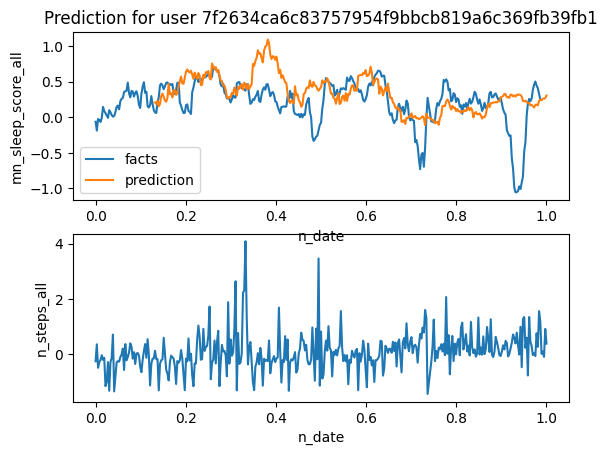

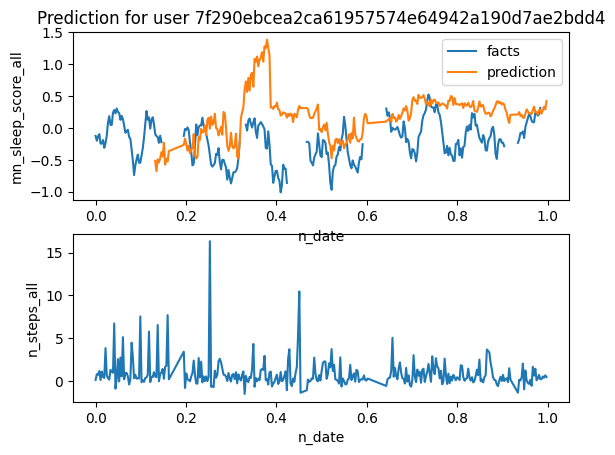

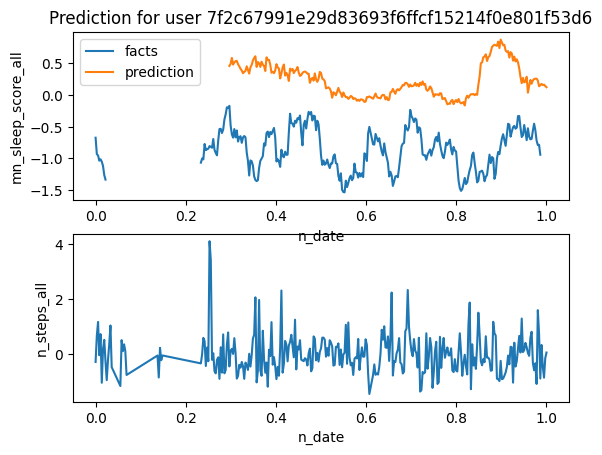

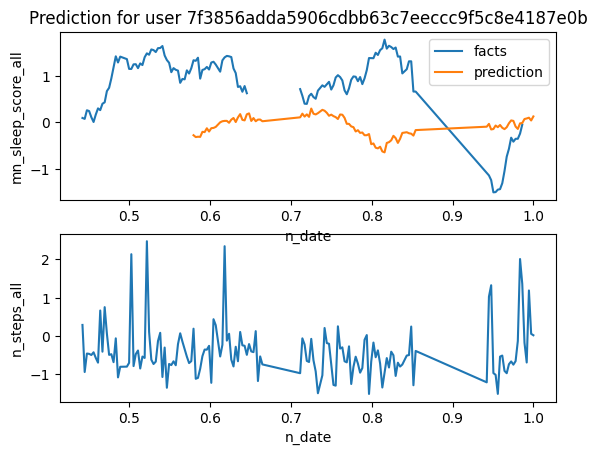

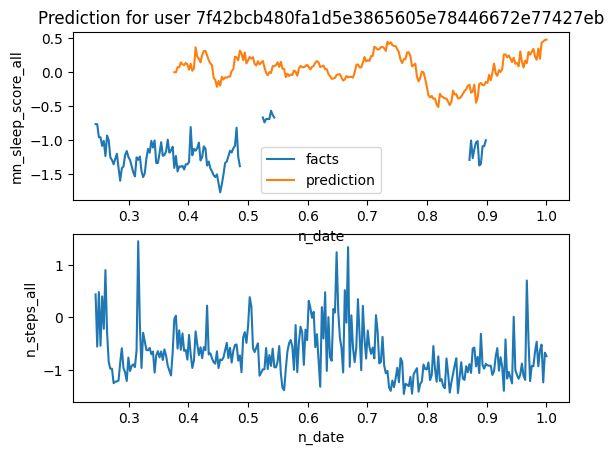

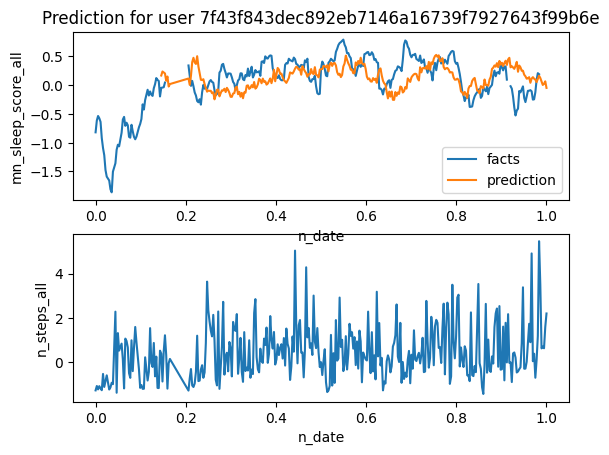

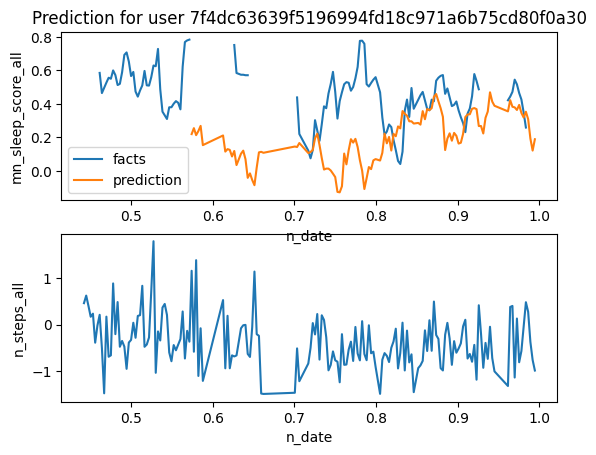

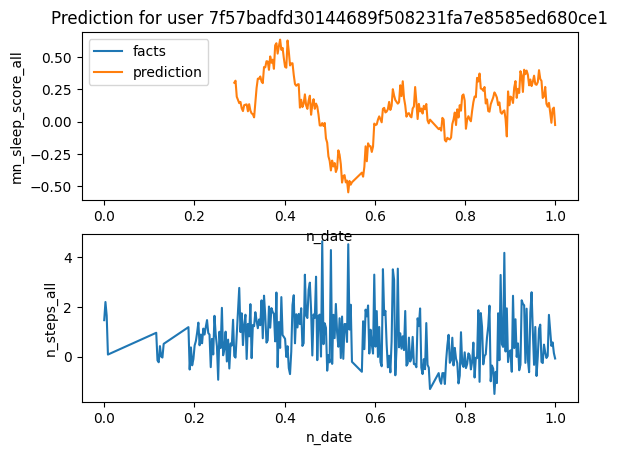

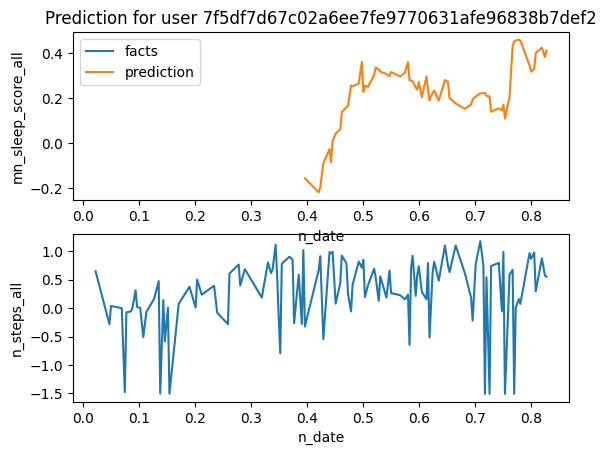

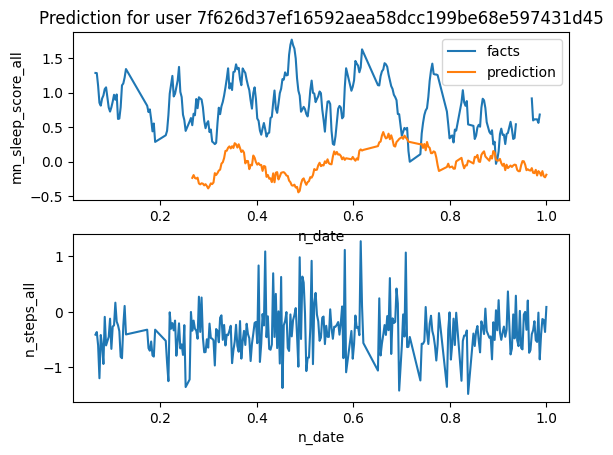

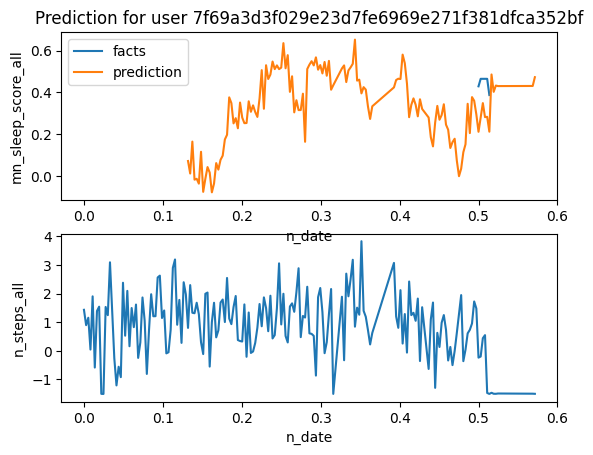

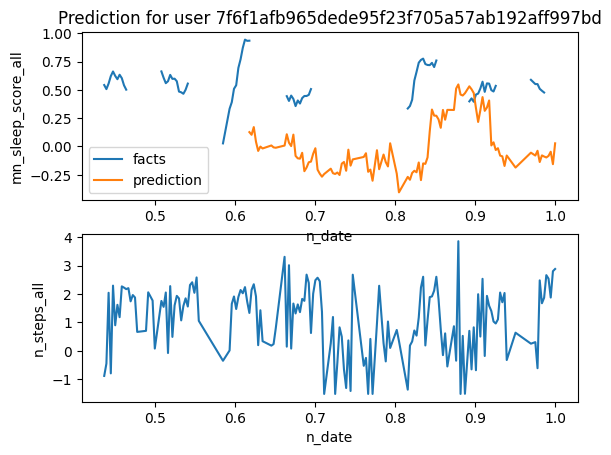

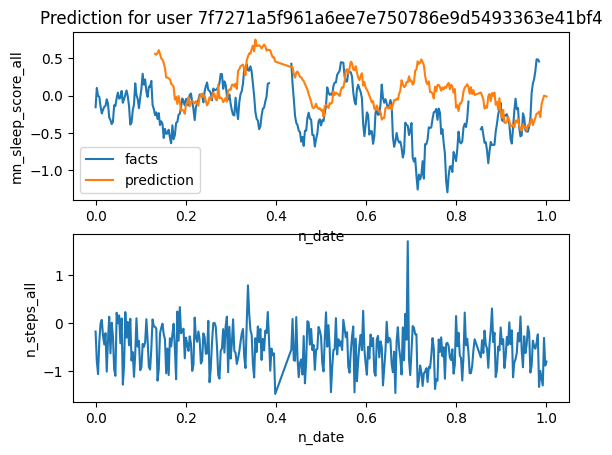

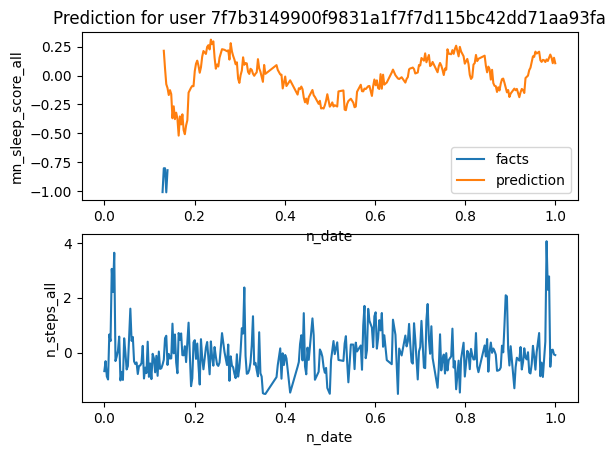

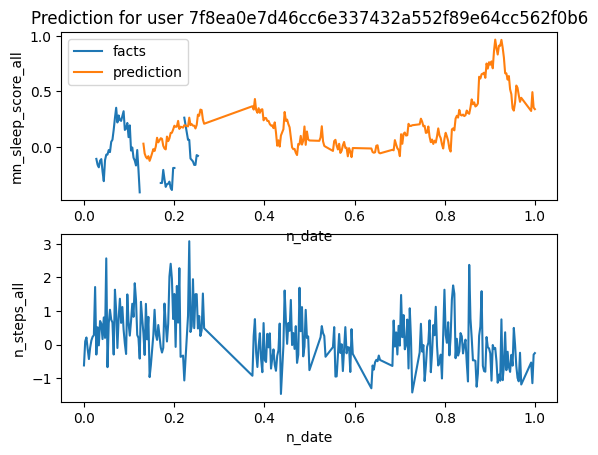

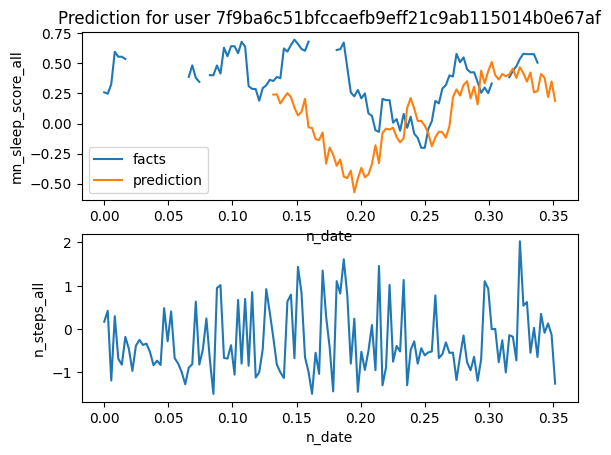

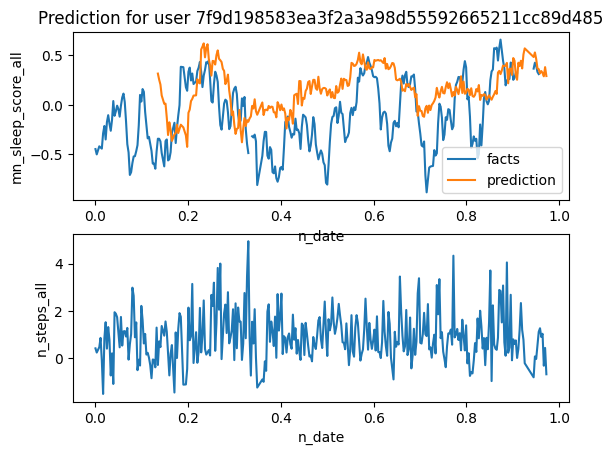

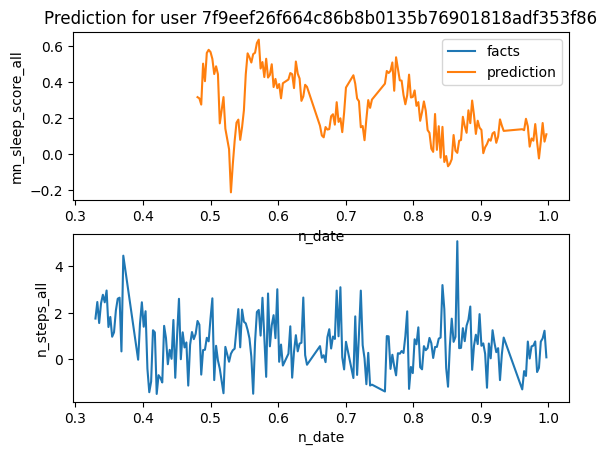

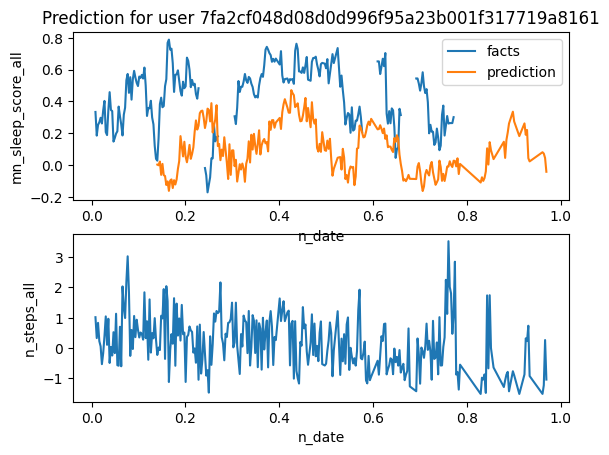

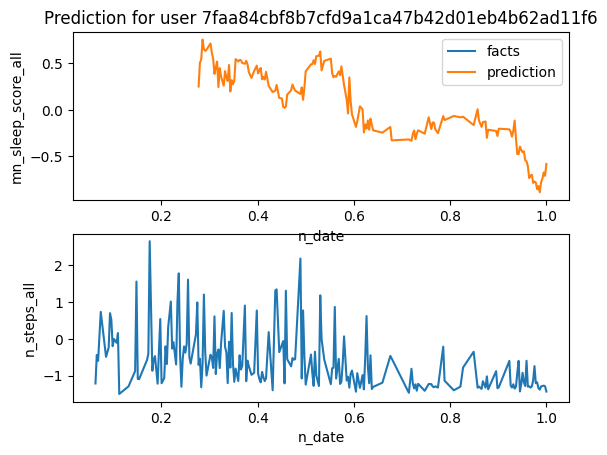

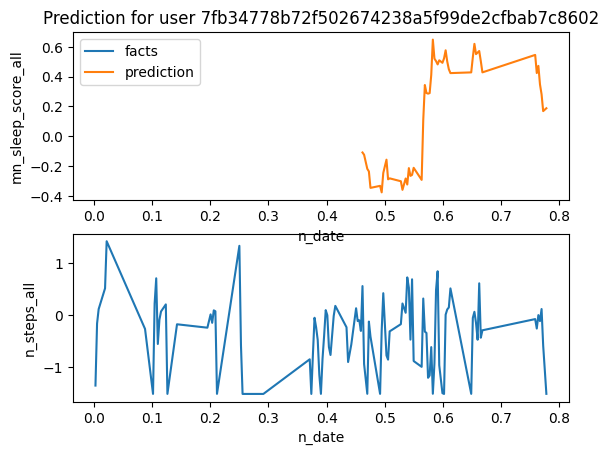

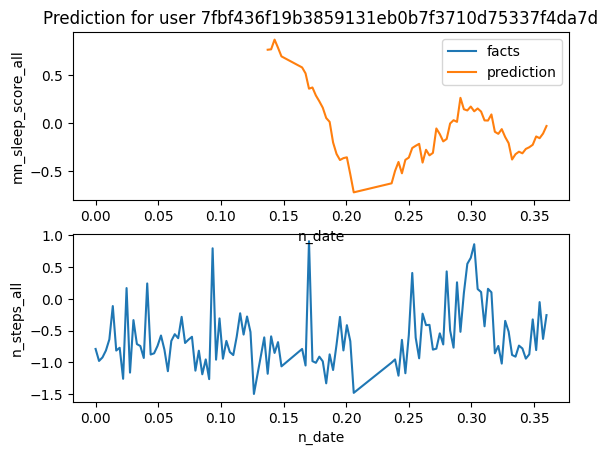

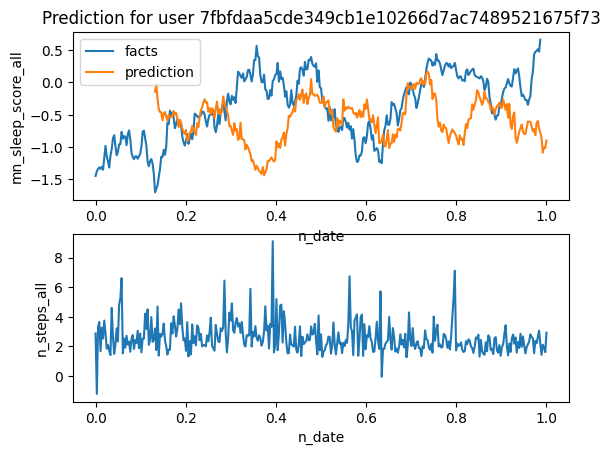

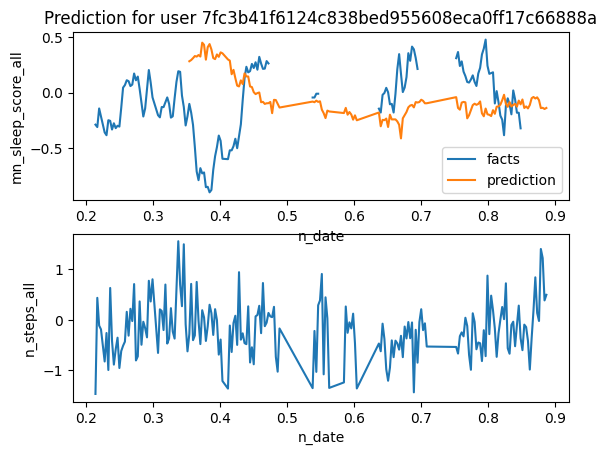

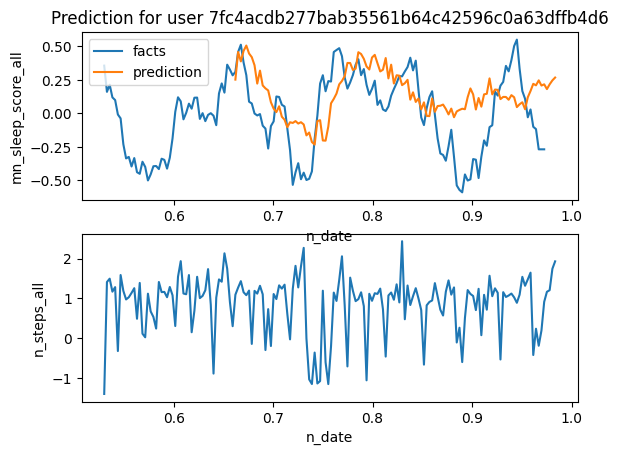

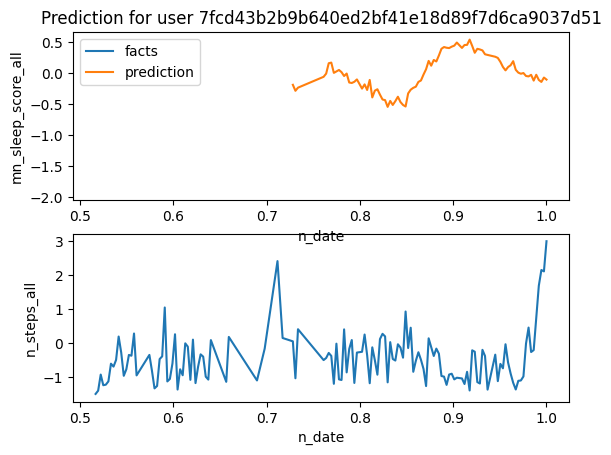

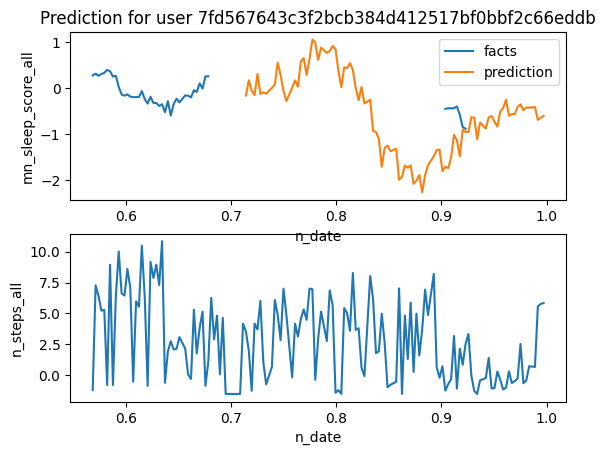

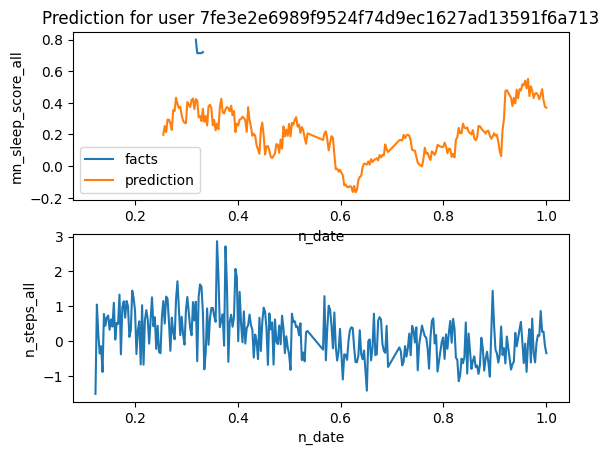

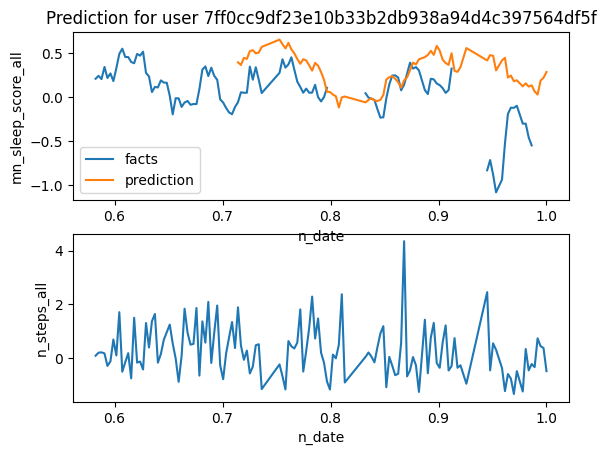

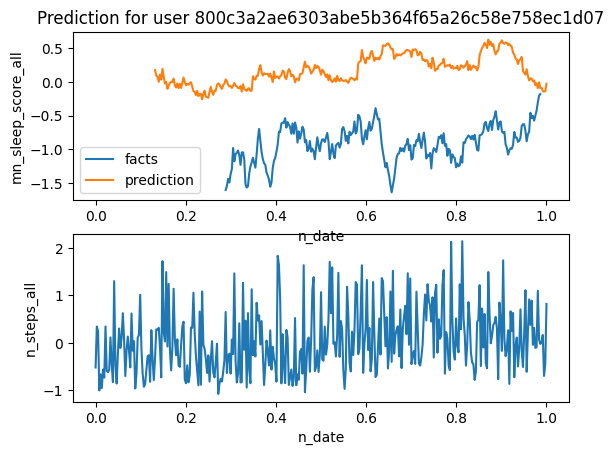

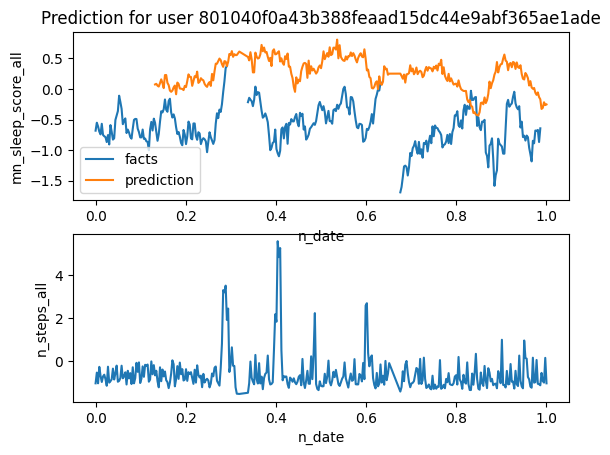

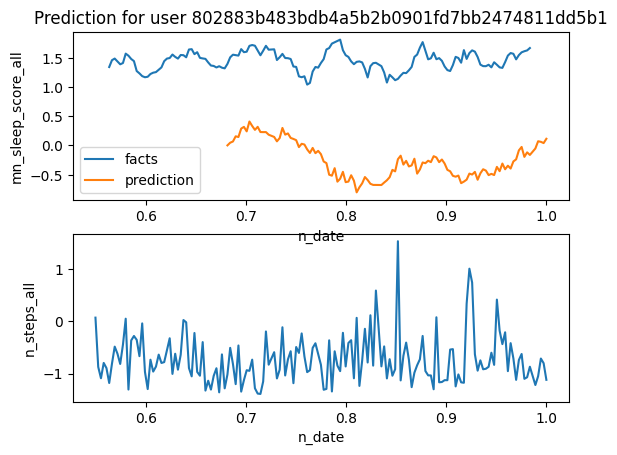

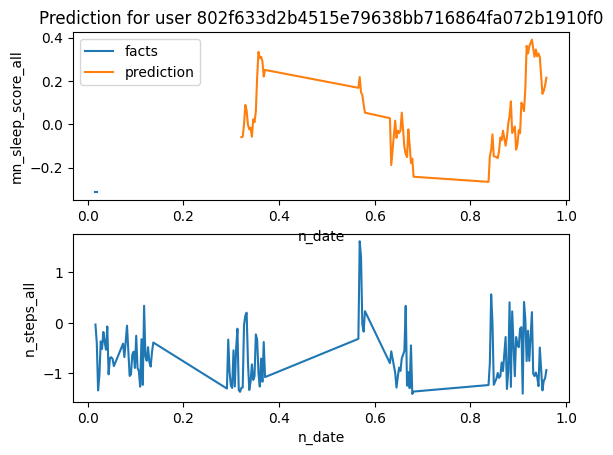

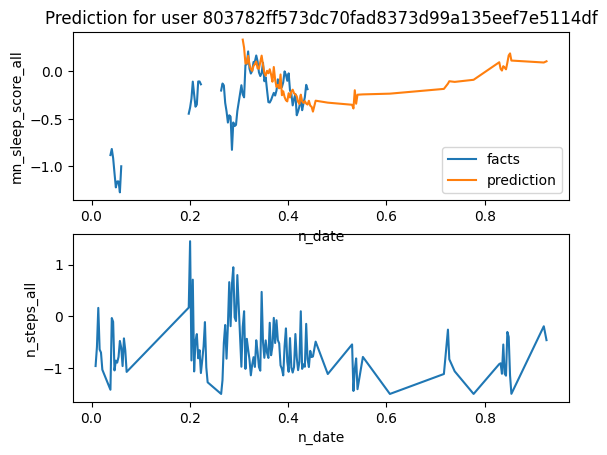

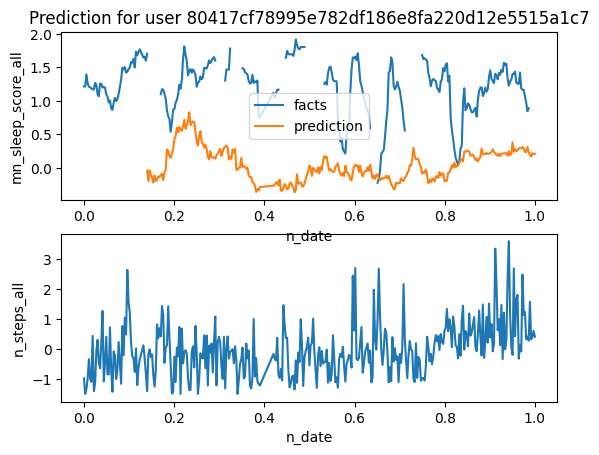

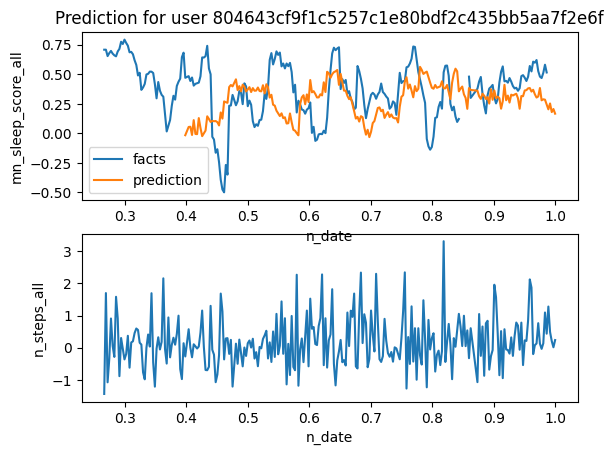

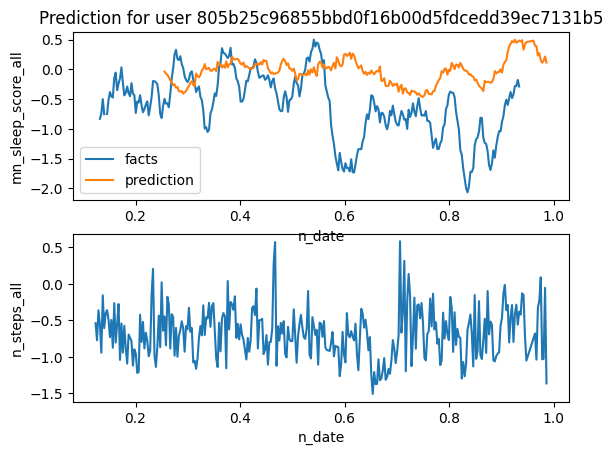

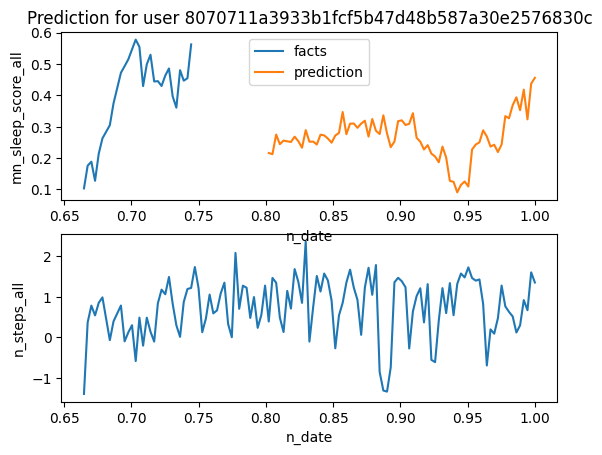

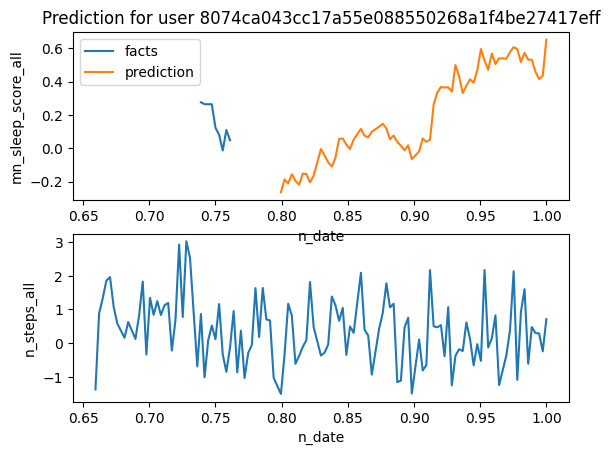

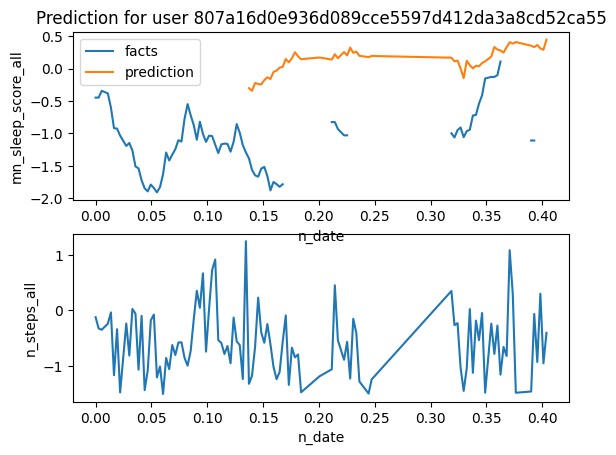

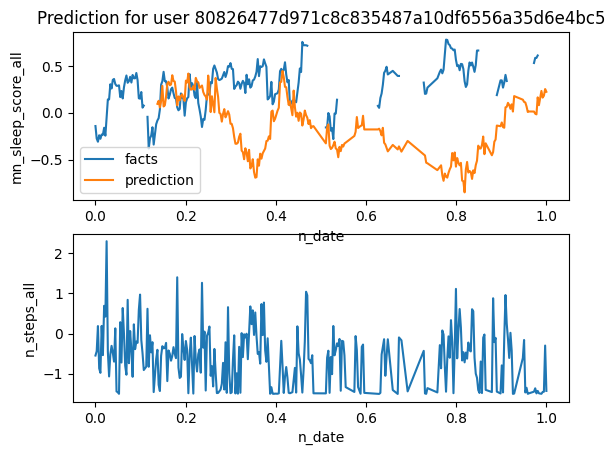

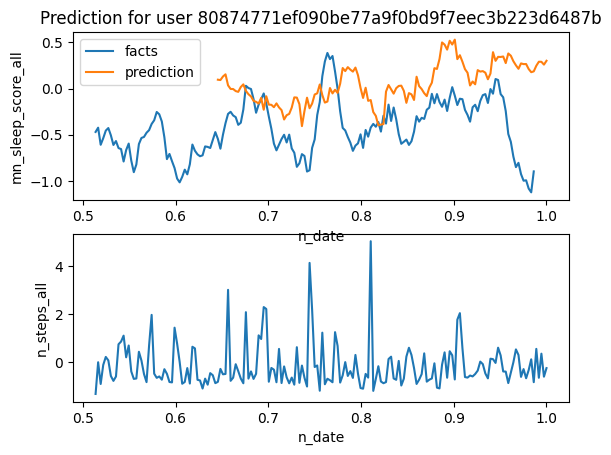

In [8]:
DateSleepStepPredictionVisualization(model, data = DateStepSleepData(sleep_score="mn_sleep_score_all",chunk_start=DEFAULT_CHUNK_START+DEFAULT_CHUNK_SIZE*10)).visualize()